# Chapter 37 - Autoencoders
## Building Machine Learning and Deep Learning Models on Google Cloud Platform
### Ekaba Bisong

In [0]:
# import TensorFlow 2.0 with GPU
!pip install -q tf-nightly-gpu-2.0-preview

In [0]:
# import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# import dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [0]:
# change datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# scale the dataset from 0 -> 255 to 0 -> 1
x_train /= 255
x_test /= 255

In [0]:
# flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
# create the autoencoder model
def model_fn():
  model_input = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(units=512, activation='relu')(model_input)
  encoded = tf.keras.layers.Dense(units=128, activation='relu')(encoded)
  encoded = tf.keras.layers.Dense(units=64, activation='relu')(encoded)
  coding_layer = tf.keras.layers.Dense(units=32)(encoded)
  decoded = tf.keras.layers.Dense(units=64, activation='relu')(coding_layer)
  decoded = tf.keras.layers.Dense(units=128, activation='relu')(decoded)
  decoded = tf.keras.layers.Dense(units=512, activation='relu')(decoded)
  decoded_output = tf.keras.layers.Dense(units=784)(decoded)
  
  # the autoencoder model
  autoencoder_model = tf.keras.Model(inputs=model_input, outputs=decoded_output)

  # compile the model
  autoencoder_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return autoencoder_model

In [0]:
# build the model
autoencoder_model = model_fn()

In [0]:
# print autoencoder model summary
autoencoder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320  

In [0]:
# train the model
autoencoder_model.fit(x_train, x_train, epochs=1000, batch_size=256,
                      shuffle=True, validation_data=(x_test, x_test))

W0613 18:32:31.877257 139754218076032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1251: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4124 - accuracy: 0.7993 - val_loss: 0.3062 - val_accuracy: 0.8012
Epoch 2/1000
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2932 - accuracy: 0.8008 - val_loss: 0.3026 - val_accuracy: 0.7978
Epoch 3/1000
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2826 - accuracy: 0.8014 - val_loss: 0.2615 - val_accuracy: 0.8025
Epoch 4/1000
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2748 - accuracy: 0.8020 - val_loss: 0.2706 - val_accuracy: 0.7976
Epoch 5/1000
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2774 - accuracy: 0.8010 - val_loss: 0.2771 - val_accuracy: 0.8015
Epoch 6/1000
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2607 - accuracy: 0.8023 - val_loss: 0.2460 - val_accuracy: 0.8030
Epoch 7/1000
60000/60000 [==================

In [0]:
# visualize reconstruction
sample_size = 6
test_image = x_test[:sample_size]
# reconstruct test samples
test_reconstruction = autoencoder_model.predict(test_image)

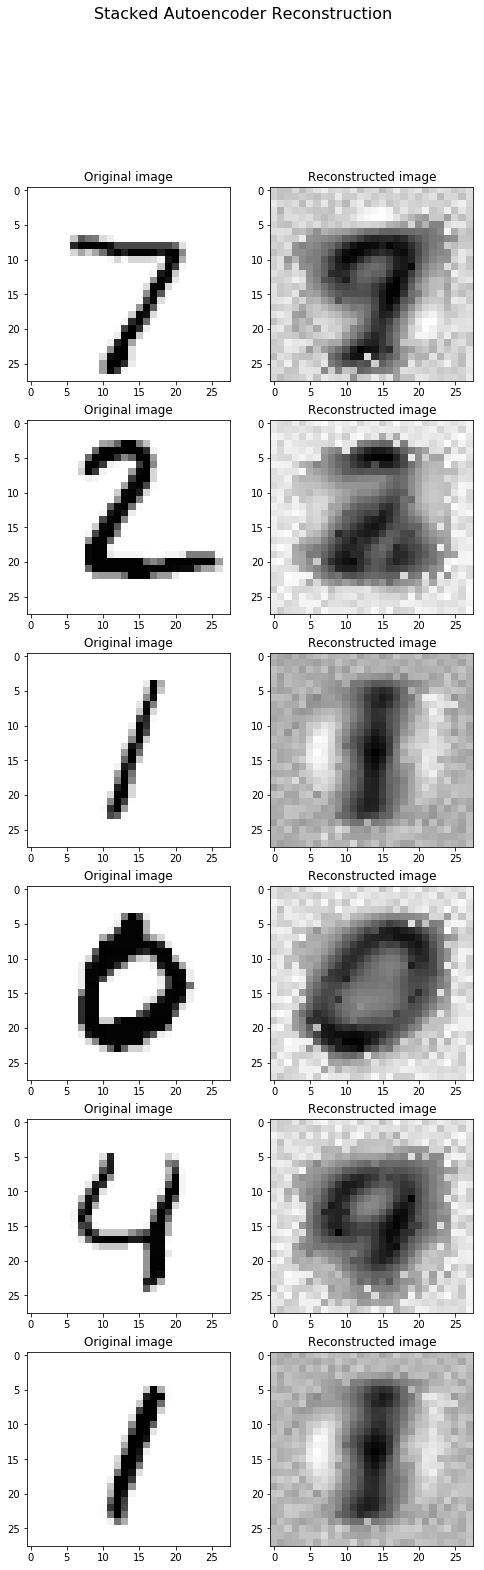

In [0]:
plt.figure(figsize = (8,25))
plt.suptitle('Stacked Autoencoder Reconstruction', fontsize=16)
for i in range(sample_size):
    plt.subplot(sample_size, 2, i*2+1)
    plt.title('Original image')
    plt.imshow(test_image[i].reshape((28, 28)), cmap="Greys", interpolation="nearest", aspect='auto')
    plt.subplot(sample_size, 2, i*2+2)
    plt.title('Reconstructed image')
    plt.imshow(test_reconstruction[i].reshape((28, 28)), cmap="Greys", interpolation="nearest", aspect='auto')
plt.show()